In [28]:
import pandas as pd
import seaborn as sns

In [29]:
pd.set_option("display.max_columns", None)

# DATA ACQUIRING, CLEANING AND PROCESSING 

READING, CLEANING AND MERGING SONGS INFO FROM MULTIPLE CSV FILES

In [30]:
# join songs, song chart and song popularity csv tables

songs_df = pd.read_csv("/content/songs.csv", sep="\t")

songs_pop = pd.read_csv("/content/song_pop.csv", sep="\t")

songs_chart = pd.read_csv("/content/song_chart.csv", sep="\t")


In [17]:
songs_pop.shape

(25193, 4)

In [31]:
# DATA CLEANING AND PROCESSING STEP -- CHECKING UNIQUE VALUES
print("unique songs in the songs_pop dataframe", songs_pop["song_id"].unique().shape)

# DATA CLEANING AND PROCESSING STEP -- DROP DUPLICATES
print("songs_pop initial shape: ", songs_pop.shape)
songs_pop = songs_pop.drop_duplicates(subset=["song_id"])

# DATA CLEANING AND PROCESSING STEP -- DROP NA VALUES
songs_pop = songs_pop.dropna()

print("songs_pop after processing shape: ", songs_pop.shape)

# DATA CLEANING AND PROCESSING STEP -- MERGING TABLES
songs_df = songs_df.merge(songs_pop, on="song_id", how="left", suffixes=("_song", "_song_pop"))





# DATA CLEANING AND PROCESSING STEP -- CHECKING UNIQUE VALUES
print("unique songs in the songs_pop dataframe", songs_pop["song_id"].unique().shape)

# DATA CLEANING AND PROCESSING STEP -- DROP DUPLICATES
print("songs_pop initial shape: ", songs_chart.shape)
songs_chart = songs_chart.drop_duplicates(subset=["song_id"])

# DATA CLEANING AND PROCESSING STEP -- DROP NA VALUES
songs_chart = songs_chart.dropna()

print("songs_pop after processing shape: ", songs_chart.shape)

# DATA CLEANING AND PROCESSING STEP -- MERGING TABLES
songs_df = songs_df.merge(songs_chart, on="song_id", how="left", suffixes=("_song", "_song_chart"))

unique songs in the songs_pop dataframe (20402,)
songs_pop initial shape:  (25193, 4)
songs_pop after processing shape:  (20402, 4)
unique songs in the songs_pop dataframe (20402,)
songs_pop initial shape:  (250392, 5)
songs_pop after processing shape:  (20402, 5)


In [32]:
songs_df.columns

Index(['song_id', 'song_name', 'billboard', 'artists', 'popularity',
       'explicit', 'song_type', 'year_end_score', 'is_pop', 'year',
       'rank_score', 'peak_position', 'weeks_on_chart', 'week'],
      dtype='object')

READING TRACKS INFO AND ACOUSTIC FEATURES FOR MERGING WITH THE SONGS DATAFRAME

In [33]:
# read tracks and acoustic features csv

tracks_df = pd.read_csv("/content/tracks.csv", sep="\t")

af_df = pd.read_csv("/content/acoustic_features.csv", sep="\t")

In [34]:
# DATA CLEANING AND PROCESSING STEP -- MERGING TABLES WITH THE ORIGINAL SONG TABLE


# merge songs and their respective albums
songs_df = songs_df.merge(tracks_df, on="song_id", how="left", suffixes=("_song", "_track"))

# merge acoustic features with their respective songs
songs_df = songs_df.merge(af_df, on="song_id", how="left", suffixes=("_song", "_af"))

READING AND MERGING ARTISTS INFO INTO ONE DATAFRAME

In [35]:
# read artists info
artists_df = pd.read_csv("/content/artists.csv", sep="\t")

In [36]:
# read the artists_pop
artists_pop = pd.read_csv("/content/artist_pop.csv", sep="\t")


# DATA CLEANING AND PROCESSING STEP -- DROPPING UNNECESSARY COLUMNS

# drop year_end_score and year as they are not necessary
artists_pop = artists_pop.drop(["year_end_score", "year"], axis=1)


# DATA CLEANING AND PROCESSING STEP -- GROUP BY TO AGGREGATE THE POPULARITY OF THE ARTIST

# for each artist to determine if they are popular or not consider if they were popular for majority of the albums
temp = artists_pop.groupby("artist_id")['is_pop'].agg(lambda x: x.value_counts().index[0])
artists_pop = temp.reset_index()

In [37]:
artists_pop = artists_pop.dropna()

In [38]:
# MERGING TABLES -- DATA CLEANING AND PROCESSING STEP
artists_df = artists_df.merge(artists_pop, on="artist_id", how="left")

In [39]:
# read and merge albums info

# albums_df = pd.read_csv("/content/albums.csv", sep="\t")
# albums_df = albums_df.drop(columns=["artists"])

# albums_pop = pd.read_csv("/content/album_pop.csv", sep="\t")
# album_pop = albums_pop.drop(["year_end_score", "year"], axis=1)

# temp2 = albums_pop.groupby("album_id")['is_pop'].agg(lambda x: x.value_counts().index[0])
# albums_pop = temp2.reset_index()

In [40]:
# DATA CLEANING AND PROCESSING STEP -- USING APPLY -- CONVERTING DICT STRUCTURE OF songs_df TO OBTAIN ARTIST'S ID FOR JOINING

# convert the string dict of artists to dict and extract the artist id
artist_id = songs_df["artists"].apply(lambda x: list(eval(x).keys())[0])

# merge artist id to songs_df
songs_df["artist_id"] = artist_id

In [41]:
# DATA CLEANING AND PROCESSING STEP -- MERGING TABLES

# merge albums and songs tables
songs_df = songs_df.merge(artists_df, on="artist_id", how="left", suffixes=("_song", "_artist"))

In [42]:
# DROPING ARTISTS COLUMN CONTAINGING THE DICT STRUCTURE (UNNECESSARY) -- DATA CLEANING AND PROCESSING STEP

songs_df = songs_df.drop(["artists"], axis=1)

DROPPING NULL VALUES FROM THE FINAL DATAFRAME

In [43]:
# DATA CLEANING AND PROCESSING STEP -- DROPPING NULL VALUES BEFORE WRITING TO CSV FILE

songs_df = songs_df.dropna()

REMOVING OUTLIERS BASED ON THE DURATION OF THE SONG

In [44]:
# DATA CLEANING AND PROCESSING STEP -- REMOVING OUTLIERS BASED ON DURATION OF THE SONGS
# only keeping songs which are less than 13 mins in duration

songs_df = songs_df[songs_df["duration_ms"] <= 800000]

In [45]:
# WRITE DF TO CSV
songs_df = songs_df.to_csv("/content/after_merge_2.csv", sep="\t")

In [46]:
import pandas as pd

In [47]:
songs_df = pd.read_csv("/content/after_merge_2.csv", sep="\t", index_col=0)

<ipython-input-47-77c43a3b7b16>:1: DtypeWarning: Columns (33) have mixed types. Specify dtype option on import or set low_memory=False.
  songs_df = pd.read_csv("/content/after_merge_2.csv", sep="\t", index_col=0)


In [48]:
songs_df = songs_df.rename(columns={"name": "artist_name"})

In [ ]:
# DATA CLEANING AND PROCESSING -- SINCE WE HAVE NULL VALUES FOR RELEASE YEAR, WE WILL BE CONSIDERING RELEASE DATE

songs_df["year"].isna().sum()

0

In [ ]:
songs_df["release_date"].isna().sum()

0

CONVERTING RELEASE_DATA FORMAT

In [ ]:
# CONVERTING OBJECT TO DATETIME FORMAT FOR RELEASE_DATE -- DATA CLEANING AND PROCESSING STEP

songs_df["release_date"] = pd.to_datetime(songs_df['release_date'], format='%Y-%m-%d')

In [ ]:
#  CHECKING THE DATA TYPES OF THE COLUMNS -- -- DATA CLEANING AND PROCESSING STEP

songs_df.dtypes

song_id                           object
song_name                         object
billboard                         object
popularity_song                    int64
explicit                            bool
song_type                         object
year_end_score                   float64
is_pop_song                         bool
year                             float64
album_id                          object
track_number                       int64
release_date              datetime64[ns]
release_date_precision            object
duration_ms                        int64
key                                int64
mode                               int64
time_signature                     int64
acousticness                     float64
danceability                     float64
energy                           float64
instrumentalness                 float64
liveness                         float64
loudness                         float64
speechiness                      float64
valence         

In [ ]:
songs_df.columns

Index(['song_id', 'song_name', 'billboard', 'popularity_song', 'explicit',
       'song_type', 'year_end_score', 'is_pop_song', 'year', 'album_id',
       'track_number', 'release_date', 'release_date_precision', 'duration_ms',
       'key', 'mode', 'time_signature', 'acousticness', 'danceability',
       'energy', 'instrumentalness', 'liveness', 'loudness', 'speechiness',
       'valence', 'tempo', 'artist_id', 'artist_name', 'followers',
       'popularity_artist', 'artist_type', 'main_genre', 'genres', 'image_url',
       'is_pop_artist'],
      dtype='object')

DROPPING ROWS WHICH ARE NOT USEFUL

In [49]:
# DROPPING COLUMNS NOT USEFUL FOR SONG POPULARITY PREDICTION -- DATA CLEANING AND PROCESSING STEP

songs_df = songs_df.drop([
        'track_number',
        'image_url',
        'artist_id',
        'billboard',
        'album_id',
        # 'popularity_song',
        'release_date_precision',
        'release_date'
    ],
    axis=1
)

In [50]:
# DATA CLEANING AND PROCESSING -- REMOVING OUTLIERS

songs_df = songs_df[songs_df["duration_ms"] <= 800000]

In [51]:
# write the data to a folder
songs_df.to_csv("/content/phase2_data.csv", sep="\t")

In [52]:
songs_df.columns

Index(['song_id', 'song_name', 'popularity_song', 'explicit', 'song_type',
       'year_end_score', 'is_pop_song', 'year', 'rank_score', 'peak_position',
       'weeks_on_chart', 'week', 'duration_ms', 'key', 'mode',
       'time_signature', 'acousticness', 'danceability', 'energy',
       'instrumentalness', 'liveness', 'loudness', 'speechiness', 'valence',
       'tempo', 'artist_name', 'followers', 'popularity_artist', 'artist_type',
       'main_genre', 'genres', 'is_pop_artist'],
      dtype='object')

# EDA -- EXPLORATORY DATA ANALYSIS

In [ ]:
import matplotlib.pyplot as plt

GETTING OVERALL STATS OF EACH FEATURE IN THE DATASET

from this we get to the know the 

In [ ]:
# EDA -- DESCRIBING THE DATAFRAME TO GET SOME STATISTICS ABOUT THE DATA

songs_df.describe()

,year_end_score,year,duration_ms,key,mode,time_signature,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,valence,tempo,popularity_artist
count,20386.000000,20386.000000,20386.000000,20386.000000,20386.000000,20386.000000,20386.000000,20386.000000,20386.000000,20386.000000,20386.000000,20386.000000,20386.000000,20386.000000,20386.000000,20386.000000
mean,719.424066,1987.630285,228937.153831,5.225302,0.726969,3.943540,0.265285,0.600397,0.625057,0.047376,0.192171,-8.843792,0.067522,0.607838,120.313258,57.539095
std,733.503540,16.457559,62968.659993,3.566917,0.445527,0.289292,0.264401,0.150586,0.197107,0.168151,0.163649,3.591486,0.074343,0.236471,27.690074,21.166262
min,1.000000,1964.000000,24604.000000,0.000000,0.000000,0.000000,0.000001,0.000000,0.006640,0.000000,0.013000,-30.896000,0.000000,0.000000,0.000000,0.000000
25%,153.000000,1973.000000,186446.750000,2.000000,0.000000,4.000000,0.039300,0.502000,0.481000,0.000000,0.088300,-11.216500,0.031800,0.427000,99.707750,44.000000
50%,489.000000,1986.000000,222940.000000,5.000000,1.000000,4.000000,0.170000,0.608000,0.640000,0.000010,0.129000,-8.471000,0.040400,0.632000,118.951000,61.000000
75%,1094.000000,2002.000000,259529.750000,8.000000,1.000000,4.000000,0.440000,0.706000,0.783000,0.001100,0.248750,-6.051000,0.063000,0.804000,135.902250,73.000000
max,6400.000000,2018.000000,744867.000000,11.000000,1.000000,5.000000,0.995000,0.988000,0.998000,0.985000,0.997000,3.440000,0.950000,1.000000,231.028000,100.000000


PLOTTING HEATMAP TO SHOW THE CORRELATION BETWEEN THE VARIABLES IN THE DATASET

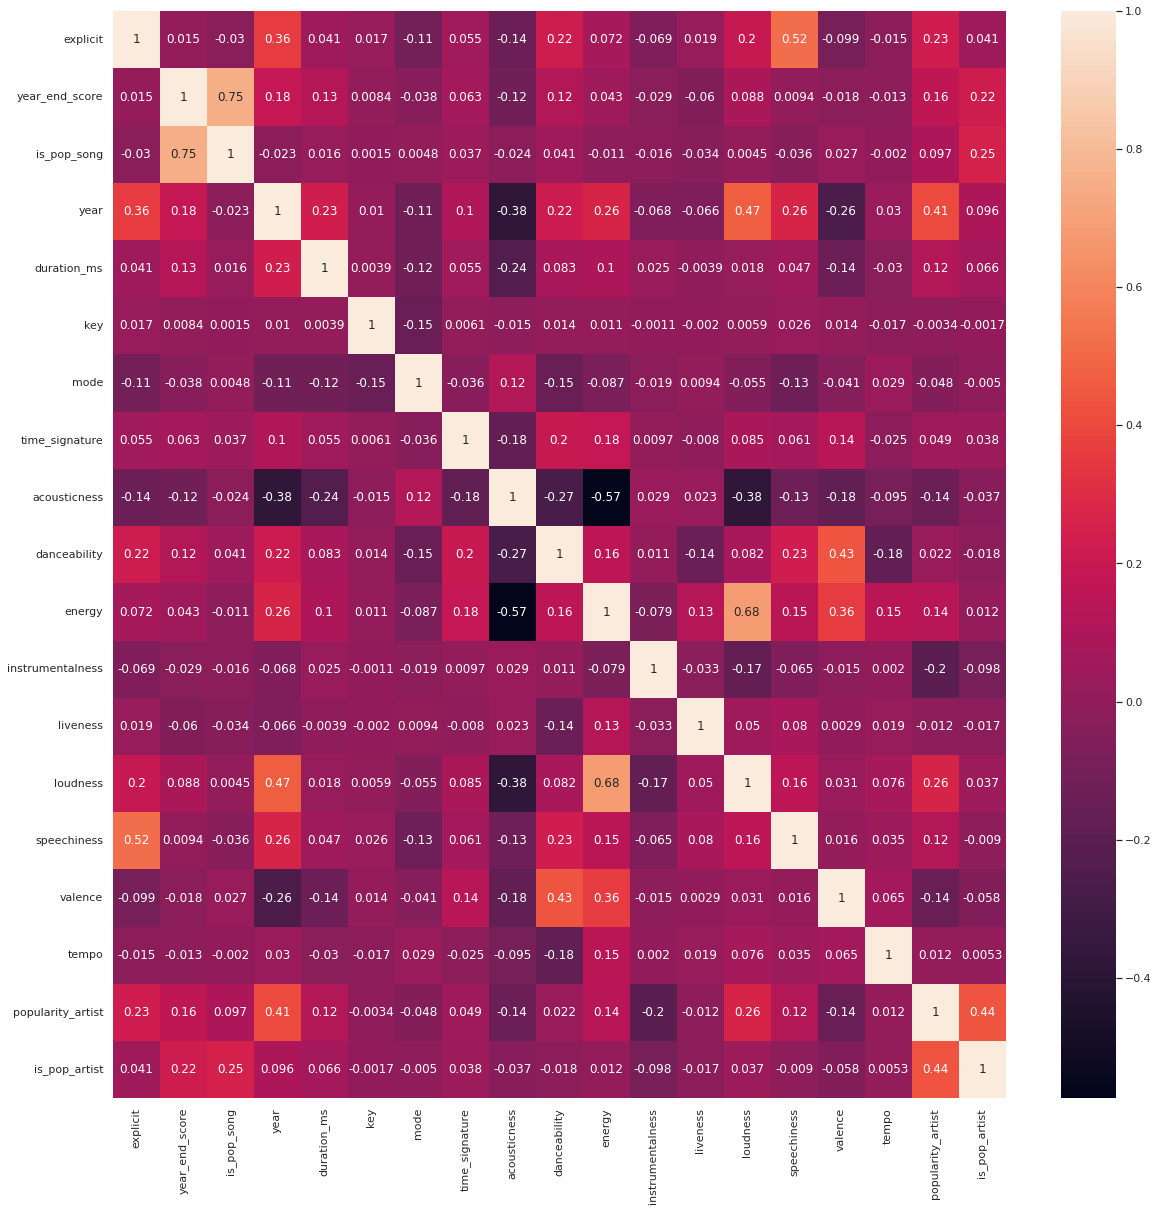

In [ ]:
# EDA -- PLOTTING CORRELATION MATRIX TO FIND HOW THE VARIABLES ARE RELATED -- HEAT MAP

sns.set(rc={'figure.figsize':(20, 20)})
ax = sns.heatmap(songs_df.corr(), annot=True)

PLOTTING BAR CHART DEPICTING COUNT DISTRIBUTION OF POPULARITY OF SONGS

From this graph we can infer the total number of popular and unpopular songs

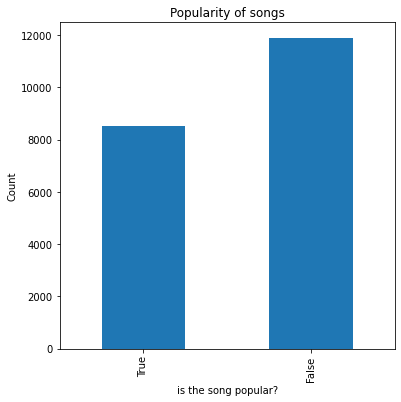

In [ ]:
# EDA -- PLOTTING BAR CHART DEPICTING COUNT DISTRIBUTION OF POPULARITY OF SONGS

songs_df.is_pop_song.value_counts().sort_values().plot(kind = "bar", figsize=(6,6))
plt.title("Popularity of songs")
plt.xlabel('is the song popular?')
plt.ylabel('Count')
plt.show()

LINE GRAPH - TRENDS OF SONGS OVER THE YEARS USING LINE GRAPH

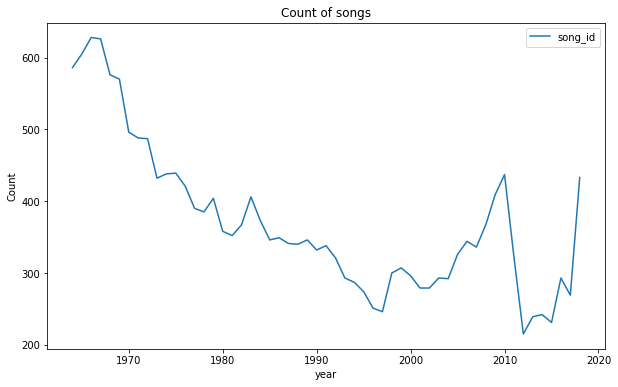

In [ ]:
# EDA -- SONG COUNT OVER THE YEARS -- TREND

songs_df[["song_id", "year"]].groupby(["year"]).count().plot(kind="line", figsize=(10,6))
plt.title("Count of songs")
plt.xlabel('year')
plt.ylabel('Count')
plt.show()

EXPLICIT SONG COUNT OVER THE YEARS -- TREND

from the below graph we see that the number of explicit songs increases exponentially with the year

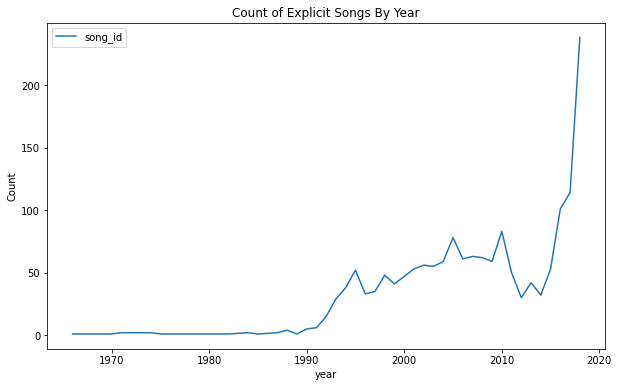

In [ ]:
# EDA -- EXPLICIT SONG COUNT OVER THE YEARS -- TREND

songs_df[songs_df["explicit"] == True][["song_id", "year"]].groupby(["year"]).count().plot(kind="line", figsize=(10,6))
plt.title("Count of Explicit Songs By Year")
plt.xlabel('year')
plt.ylabel('Count')
plt.show()

LINE GRAPH - NON EXPLICIT OVER THE YEARS -- TREND

From the below graph we can see that the number of non-explicit songs decreases drastically over the years


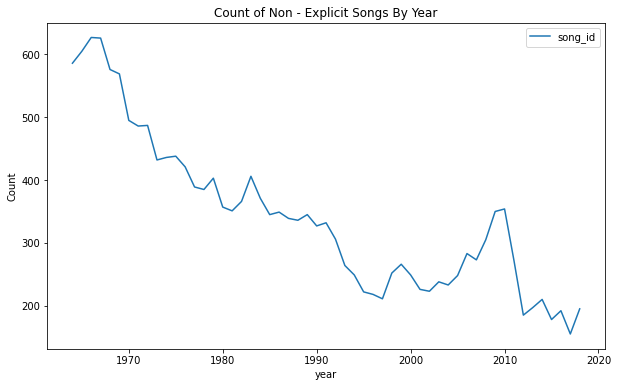

In [ ]:
# EDA -- NON EXPLICIT OVER THE YEARS -- TREND

songs_df[songs_df["explicit"] == False][["song_id", "year"]].groupby(["year"]).count().plot(kind="line", figsize=(10,6))
plt.title("Count of Non - Explicit Songs By Year")
plt.xlabel('year')
plt.ylabel('Count')
plt.show()

BAR GRAPH -- TOP 10 GENRES OF ALL TIMES

We can infer which genres the popular songs belonged to throughout the years

<AxesSubplot:title={'center':'Top 10 genres of all times'}, xlabel='genres', ylabel='count'>

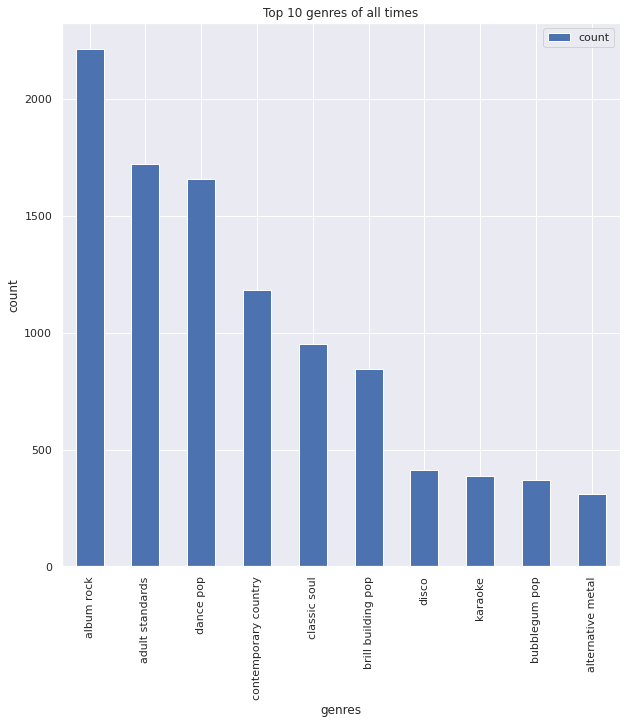

In [ ]:
# EDA -- BAR GRAPH SHOWING TOP 10 GENRES OF ALL TIMES

temp4 = songs_df.groupby("main_genre")["main_genre"].count().to_frame().rename(columns={"main_genre": "count"}).reset_index()
temp4 = temp4.sort_values(by="count", ascending=False).iloc[:11].reset_index(drop=True)
temp4 = temp4[temp4["main_genre"] != "-"].reset_index(drop=True)

temp4.plot(
    kind="bar",
    figsize=(10, 10),
    xlabel="genres",
    ylabel="count",
    title="Top 10 genres of all times",
    x="main_genre"
)

HISTOGRAM -- SHOWING THE DISTRIBUTION OF THE SONGS BASED ON THE DURATION

from the below graph, we can infer that duration of the songs follows  a normal distribution with the mean lies around 250000 milliseconds

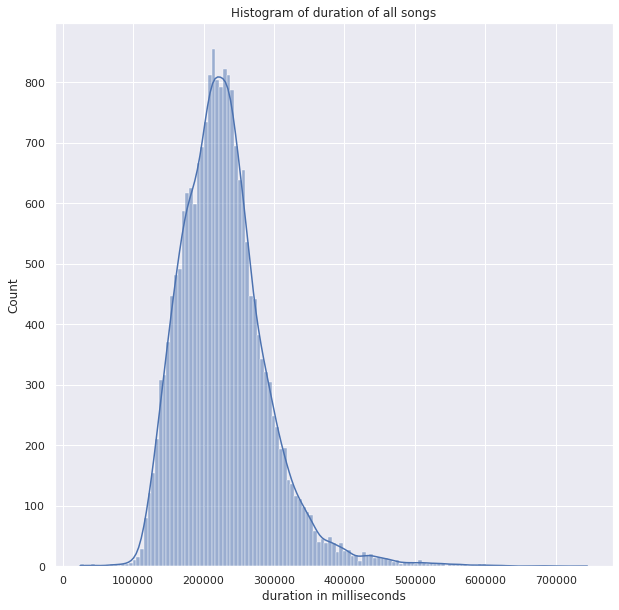

In [ ]:
# EDA -- Histogram  -- of duration of all songs

sns.set(rc={'figure.figsize': (10, 10)})
sns.histplot(data=songs_df[["duration_ms"]], x="duration_ms", kde=True)
plt.title('Histogram of duration of all songs')
plt.xlabel("duration in milliseconds")
plt.show()


In [ ]:
temp = songs_df[['mode', 'time_signature',
       'acousticness', 'danceability', 'energy', 'instrumentalness',
       'liveness', 'loudness', 'speechiness', 'valence', 'tempo']]

LINE GRAPH WITH HUE -- Song Year End Score VS Year Based on Popularity of Songs

from the below graph we infer that the average score of the popular and unpopular songs increase steadily through the years. We can account this for the increase in the delivery of the music with the use of technology

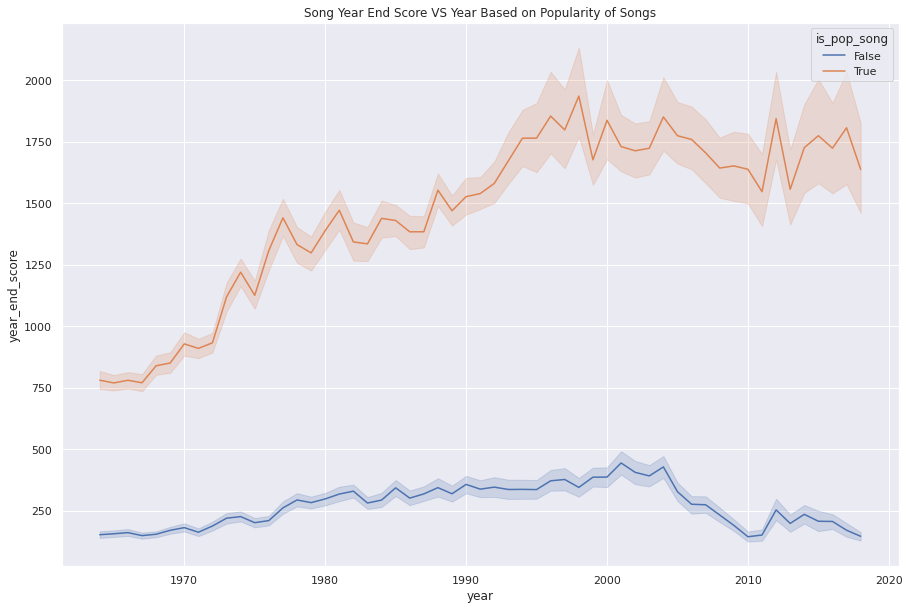

In [ ]:
# EDA -- Line Graph with Hue -- Song Year End Score VS Year Based on Popularity of Songs
sns.set(rc={'figure.figsize': (15, 10)})
sns.lineplot(
    data = songs_df[['year_end_score', 'year', 'is_pop_song']],
    x = 'year', y = 'year_end_score',
    hue = 'is_pop_song'
)
plt.title('Song Year End Score VS Year Based on Popularity of Songs')
plt.xlabel('year')
plt.ylabel('year_end_score')
plt.show()

In [ ]:
temp = songs_df[['mode', 'time_signature',
       'acousticness', 'danceability', 'energy', 'instrumentalness',
       'liveness', 'loudness', 'speechiness', 'valence', 'tempo']]

 SCATTER PLOT -- LOUDNESS VS ENERGY BASED ON POPULARITY OF SONGS

 from the below graph we see that the attributes of loudness and energy in the songs are highly correlated and that they follow a specified trend

<AxesSubplot:xlabel='loudness', ylabel='energy'>

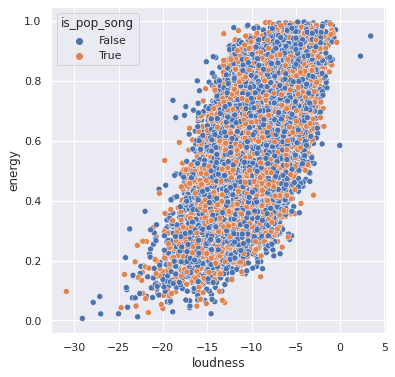

In [ ]:
# EDA -- SCATTER PLOT -- LOUDNESS VS ENERGY BASED ON POPULARITY OF SONGS
sns.set(rc={'figure.figsize': (6, 6)})
sns.scatterplot(data=songs_df[["loudness", "energy", "is_pop_song"]], x="loudness", y="energy", hue="is_pop_song")

BOX PLOT -- STATISTICS REGARDING LOUDNESS, TEMPO, TIME SIGNATURE, ACOUSTICNESS

four subplots are plotted showing the statistics regarding loudness, acousticness, danceability and valence.

the first in each box shows the stats for top 100 popular songs and the second box in each graph shows the statistics for all the songs in the dataset.

in each subplot, we can see the stats that make a song popular or not.


<ipython-input-101-8721dcb94e94>:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[0,0].set_xticklabels(("Top 100 songs", "all songs"))
<ipython-input-101-8721dcb94e94>:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[0,1].set_xticklabels(("Top 100 songs", "all songs"))
<ipython-input-101-8721dcb94e94>:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[1,0].set_xticklabels(("Top 100 songs", "all songs"))
<ipython-input-101-8721dcb94e94>:23: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[1,1].set_xticklabels(("Top 100 songs", "all songs"))


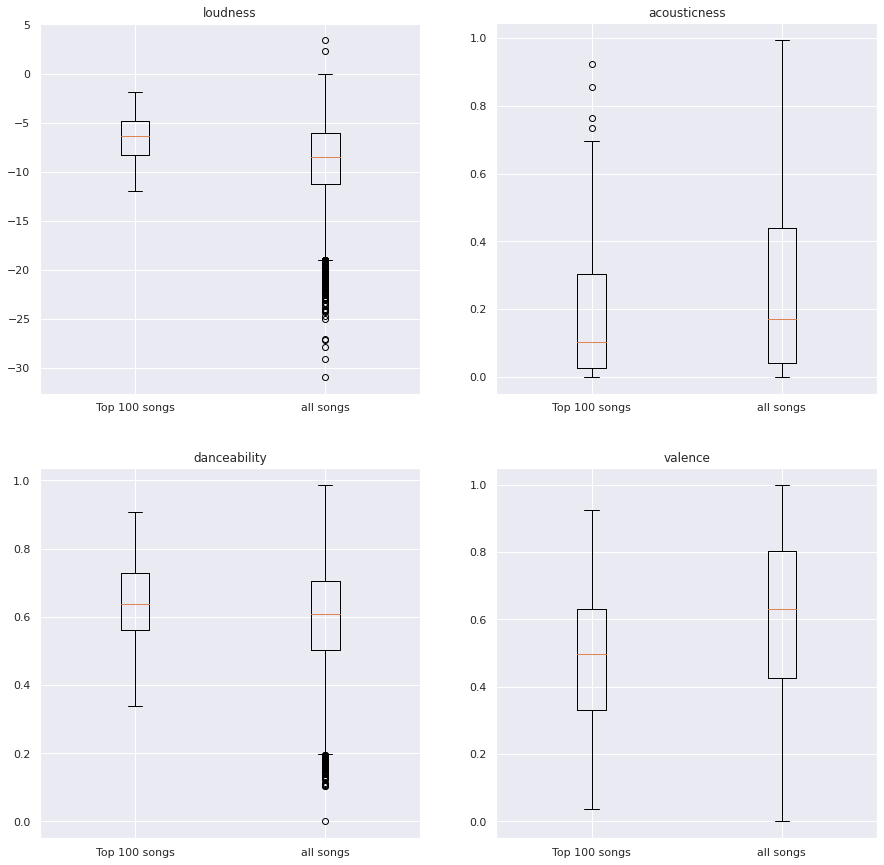

In [ ]:
# EDA -- BOX PLOT -- LOUDNESS, ACOUSTICNESS, DANCEABILITY AND VALENCE

top_hun = songs_df.sort_values(by=["year_end_score"], ascending=False).iloc[:100]

fig, axs = plt.subplots(2,2, figsize=(15,15))

# plt.title("Box plot for loudness based on Top 100 songs and the rest of the dataset")
# plt.ylabel("loudness")
axs[0,0].title.set_text("loudness")
axs[0,0].set_xticklabels(("Top 100 songs", "all songs"))
axs[0,0].boxplot([top_hun["loudness"], songs_df["loudness"]])

axs[0,1].title.set_text("acousticness")
axs[0,1].set_xticklabels(("Top 100 songs", "all songs"))
axs[0,1].boxplot([top_hun["acousticness"], songs_df["acousticness"]])

axs[1,0].title.set_text("danceability")
axs[1,0].set_xticklabels(("Top 100 songs", "all songs"))
axs[1,0].boxplot([top_hun["danceability"], songs_df["danceability"]])


axs[1,1].title.set_text("valence")
axs[1,1].set_xticklabels(("Top 100 songs", "all songs"))
axs[1,1].boxplot([top_hun["valence"], songs_df["valence"]])

plt.show()

In [ ]:
# EDA -- RADAR CHART PREP

hun_mean = songs_df.sort_values(by=["year_end_score"], ascending=False)[ ['mode', 'acousticness', 'danceability', 'energy', 'instrumentalness', 'liveness', 'speechiness', 'valence']].iloc[:100].mean()

sorted_mean = songs_df[
    ['mode', 'acousticness', 'danceability', 'energy', 'instrumentalness', 'liveness', 'speechiness', 'valence']
].mean()


RADAR GRAPH -- SHOWING MEAN OF FEATURES

below a radar graph is plotted for showing the mean of features like mode, acousticness, danceability, enery, instrumentalness, liveless, speechiness, valence for top 100 popular songs and the rest of the dataset.

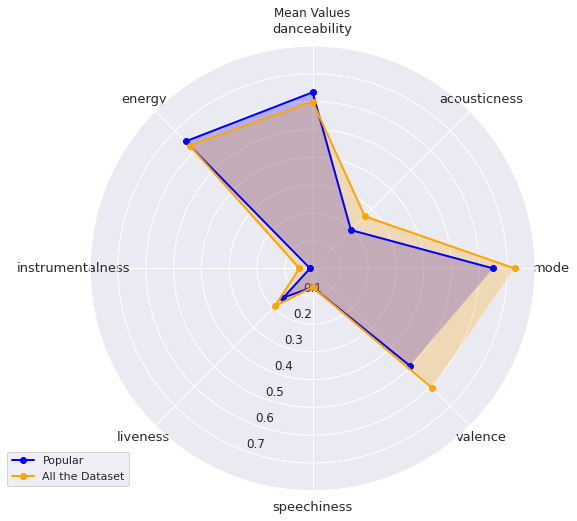

In [ ]:
# EDA -- Radar graph -- showing mean of features like
# ['mode', 'acousticness', 'danceability', 'energy', 'instrumentalness', 'liveness', 'speechiness', 'valence']
# for top 100 songs and the rest of the dataset

import numpy as np

labels = list(hun_mean.index)
features = hun_mean.tolist()
features_all = sorted_mean.tolist()

angles = np.linspace(0, 2*np.pi, len(labels), endpoint=False)
fig = plt.figure(figsize = (18,18))

ax = fig.add_subplot(221, polar=True)
ax.plot(angles, features, 'o-', linewidth=2, label = "Popular", color= 'blue')
ax.fill(angles, features, alpha=0.25, facecolor='blue')
ax.set_thetagrids(angles * 180/np.pi, labels , fontsize = 13)


ax.set_rlabel_position(250)
plt.yticks([0.1 , 0.2 , 0.3 , 0.4, 0.5,  0.6, 0.7], ["0.1",'0.2', "0.3", "0.4", "0.5", "0.6", '0.7'  ], size=12)
plt.ylim(0,0.8)

ax.plot(angles, features_all, 'o-', linewidth=2, label = "All the Dataset", color= 'orange')
ax.fill(angles, features_all, alpha=0.25, facecolor='orange')
ax.set_title('Mean Values')
ax.grid(True)

plt.legend(loc='best', bbox_to_anchor=(0.1, 0.1))
